# Analysing Accuracy and Precision of Sentiment Analysis Over Ensemble Supervised Learning Algorithms

## AIM
Sentiment analysis is a machine learning-based technique used to analyze subjective reviews in a computer-understandable language. Our project aims to compare various ML models for performing sentiment analysis. We used an umbrella dataset that combined three popular datasets to increase the diversity of training and testing data. In this project notebook, we have designed and tested multiple supervised machine learning algorithms such as - Random Forest, Extra Tree Classifier, Decision Tree, Logistic Regression, and XG Boosting. Through our experiments, we were able to showcase how other algorithms report a better performance for the use cases we have presented. We also designed a Voting Classifier that uses a majority voting method to aggregate the results obtained by all the other models and combine them to report its prediction.

## HOW TO USE THIS PROJECT
The notebook has been divided into 5 main catogories - Loading Datasets and Libraries, Dataset Processing, Visualization, Algorithms, and Results and Discussion. The client using the notebook to perform sentiment analysis is required to follow the steps in order to ensure proper functioning. The detailed information regarding each step is given as the notebook reads. The client is open to jump to any step for understanding purposes only. We highly recommend to run the cells in order for smooth functioning.

## STEP 1 - Loading Dataset and Libraries
The program requires use of multiple libraries which need to be imported into your system for use. Therefore, client needs to open a terminal window and install the libraries not present in the system using. You can refer to the following packaging guide to understand the process of installing libraries - https://packaging.python.org/en/latest/tutorials/installing-packages/

To check the current list of libraries and their versions, client can use the following guide - https://www.activestate.com/resources/quick-reads/how-to-list-installed-python-packages/

Once all the package requirements are fullfiled, client can run the first set of code cells under Step 1.

In [1]:
# Loading Necessary Libraries

import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import string
import os

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import folium
from itertools import cycle, islice
from pandas import options
import warnings
import pickle
import nltk
from matplotlib.pyplot import figure
from nltk.corpus import stopwords 
import nltk

# Downloading Special Packages Under Libraries

nltk.download('wordnet')
nltk.download('stopwords')
from tqdm import tqdm,tqdm_notebook

from  wordcloud import WordCloud
%matplotlib inline

[nltk_data] Downloading package wordnet to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## STEP 2 - Dataset Processing
Our test dataset is currently loaded in the Jupyter Notebook. However, the process to replace it with your own dataset is very simple, the client needs to follow a few simple steps.

First - Prepare the dataset. Make sure that client dataset has only two columns. Column 1 contaians the text reviews and the column heading has to be "review". Column 2 contains the sentiment value denaoted as 0 for negative and 1 for positive only. Remove all other columns form the dataset and store as CSV file.

If client sentiment value is not in the given format, then client will need to apply simple python commands to make the necessary changes. Use the following guide for help - https://www.educative.io/blog/pandas-cheat-sheet

Second - Make sure client CSV dataset file is saved in the same folder as this notebook, otherwise client will need to change the command for loading dataset.

Third - Now client can copy and paste the name of file including the extension in the first cell under this step as mentioned.

Fourth - No more changes required, just run all the following cells and wait for completion. If any errors/problems are raised, use google for simple troubleshooting and double ckeck if all previous steps were followed properly. Client can also contact us via email - guptaabhinav2205@gmail.com or somilkuchhal.kuchhal@gmail.com

### Loading Dataset

In [4]:
# Enter the name of your final dataset as: './datasets/aclimdb.csv'

DATA_SET = './FinalDataset.csv'
df =pd.read_csv(DATA_SET, index_col = 0)
df.review = df.review.astype(str)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1.0
1,A wonderful little production. <br /><br />The...,1.0
2,I thought this was a wonderful way to spend ti...,1.0
3,Basically there's a family where a little boy ...,0.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1.0
...,...,...
74676,Just realized that the Windows partition of my...,1.0
74677,Just realized that my Mac window partition is ...,1.0
74678,Just realized the windows partition of my Mac ...,1.0
74679,Just realized between the windows partition of...,1.0


### Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97927 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     97927 non-null  object 
 1   sentiment  97927 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [7]:
df.sample(5)

,review,sentiment
42314,I watched this movie at the first showing avai...,1.0
29203,"... when we all know, no one does it like the ...",0.0
2946,Thanks Treyarch,1.0
3818,What can I say...it's a memory card. Aren't t...,1.0
38217,I grew up watching and loving TNG. I just rece...,0.0


In [8]:
df.describe()

,sentiment
count,97927.000000
mean,0.511636
std,0.499867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [9]:
df.nunique()

review       94781
sentiment        2
dtype: int64

### Preprocessing Data

In [10]:
#Converting all text review to lower case

df['review']=df['review'].apply(lambda x: x.lower())
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1.0
1,a wonderful little production. <br /><br />the...,1.0
2,i thought this was a wonderful way to spend ti...,1.0
3,basically there's a family where a little boy ...,0.0
4,"petter mattei's ""love in the time of money"" is...",1.0


In [12]:
# Using the cont_to_exp() and a dictionary:{key: contractions,value:expansion}
# Converting contractions used in text reviews to full forms
# For eg. he'll --> he will

contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have",
"couldn't": "could not","couldn't've": "could not have", "didn't": "did not","doesn't": "does not","don't": "do not",
"hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not", "he'd": "he would",
"he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is", "how'd": "how did",
"how'd'y": "how do you","how'll": "how will","how's": "how does","i'd": "i would","i'd've": "i would have","i'll": "i will",
"i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have",
"it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not",
"might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not",
"mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
"shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will",
"she'll've": "she will have","she's": "she is", "should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have","so's": "so is", "that'd": "that would","that'd've": "that would have",
"that's": "that is", "there'd": "there would","there'd've": "there would have","there's": "there is", "they'd": "they would",
"they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are",
"they've": "they have", "to've": "to have","wasn't": "was not"," u ": " you "," ur ": " your "," n ": " and ",
"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have", "couldn't": "could not",
"didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
"he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
"how's": "how is",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
"mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
"this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
"we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"}


def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else : 
        return x
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))

In [13]:
# Removing the urls from the reviews

df['review']=df['review'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)) 

In [14]:
# Stopword removal : Stopwords are the words that appear quite frequently in a sentence and do not have a significant 
# contribution to the meaning of the sentence. Therefore they can be removed. 

df['review'] = df['review'].apply(lambda x:" ".join([t for t in x.split() if t not in STOP_WORDS ]))

In [15]:
# Removal of special characters from the reviews

df['review']=df['review'].apply(lambda x:re.sub(r'[^0-9a-zA-Z *]','',x))
df['review']=df['review'].apply(lambda x:re.sub(r'[^a-zA-z0-9\s]','',x))

df['review'] = df['review'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [17]:
# Removal of mulitple spaces between the words in the review

df["review"]=df["review"].apply(lambda x: " ".join(x.split()))

In [18]:
# Removal of HTML Tags: from the reviews

df['review'] = df['review'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

# Removal of tags and links 

tag = re.compile(r'<[^>]+>')

df['review'] = df['review'].apply(lambda x: tag.sub('', x)) #removing html labels

df['review'] = df['review'].replace(r'http\S+', '', regex=True).replace(r'www.\S+', '', regex=True).replace(r'http\S+', '', regex=True).replace(r'"', '', regex=True)

df

,review,sentiment
0,reviewers mentioned watching 1 oz episode hook...,1.0
1,wonderful little production br br the filming ...,1.0
2,thought wonderful way spend time hot summer we...,1.0
3,basically family little boy jake thinks zombie...,0.0
4,petter matteis love time money visually stunni...,1.0
...,...,...
74676,realized windows partition mac like 6 years nv...,1.0
74677,realized mac window partition 6 years nvidia d...,1.0
74678,realized windows partition mac 6 years nvidia ...,1.0
74679,realized windows partition mac like 6 years nv...,1.0


In [19]:
# Removal of Numbers

df['review']=df['review'].apply(lambda x:re.sub(r'[0-9]+','',x))

In [20]:
# Removal of usernames from the reviews

df['review']=df['review'].apply(lambda x:re.sub(r'@[A-Za-z0–9]+','',x))
df.sample(10)

,review,sentiment
57515,wtf going new playstation update open parties ...,0.0
36917,going shortthis adaption wonderful king book b...,0.0
25325,movie bad compared sequels original directed m...,0.0
17838,girlfight came out reviews praised it seeing i...,1.0
3182,youtuberxrqydj u s best new gaming begins call...,1.0
1510,,1.0
50884,hate bad fifa omfg,0.0
16846,wait spoil christmas year holiday,1.0
34220,fortnite,0.0
13050,looking sonicboomspecialeffects monster click ...,1.0


In [21]:
# Tokenization and Lemmanization

nltk.download('omw-1.4')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)])

df['review'] = df.review.apply(lemmatize_text).copy()

df

[nltk_data] Downloading package omw-1.4 to C:\Users\Abhinav
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,review,sentiment
0,reviewers mention watch oz episode hook right ...,1.0
1,wonderful little production br br the film tec...,1.0
2,think wonderful way spend time hot summer week...,1.0
3,basically family little boy jake think zombie ...,0.0
4,petter matteis love time money visually stun f...,1.0
...,...,...
74676,realize windows partition mac like years nvidi...,1.0
74677,realize mac window partition years nvidia driv...,1.0
74678,realize windows partition mac years nvidia dri...,1.0
74679,realize windows partition mac like years nvidi...,1.0


### Splitting Data

In [22]:
# Importing Spliting Libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

x = pd.DataFrame(df, columns = ['review']) 
y = pd.DataFrame(df, columns = ['sentiment']) 

# Split dataset into Training and Testing Data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test:  ", X_test.shape)
print("Shape of y_test:  ", y_test.shape)

Shape of x_train:  (73445, 1)
Shape of y_train:  (73445, 1)
Shape of x_test:   (24482, 1)
Shape of y_test:   (24482, 1)


### Vectorization with TF-IDF ##

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

train = X_train['review'].tolist()
test = X_test['review'].tolist()
STOPWORDS = set(stopwords.words('english'))

tfidf_vectorizer = TfidfVectorizer(max_features=1000, dtype=np.float32)

tfidfX_train = tfidf_vectorizer.fit_transform(train)
tfidfX_train = tfidfX_train.toarray()

tfidfX_test = tfidf_vectorizer.transform(test)
tfidfX_test = tfidfX_test.toarray()

print("TF-IDF train shape:", tfidfX_train.shape)
print("TF-IDF test shape:", tfidfX_test.shape)

TF-IDF train shape: (73445, 1000)
TF-IDF test shape: (24482, 1000)


## STEP 3 - Visualization
In this project, we have also focused on understanding our dataset. The word cloud visualization library of python helps us in doing so by creating pictorial representation of most used words and phrases. 

All the code cells have been designed to work seemlessly, the client all needs to run the cells wihtout making any edits. However, kindly note that this library requires a little extra time to process the data based on client system capabilities.

Once the cells have run, the client should be able to see 2 separate word clouds representing the positive and negative most used words based on the dataset and which rows have been marked +ve and -ve sentiments.

Note: This step does not affect the results of sentiment analysis. It was added as an extra educational step to help gain a better understanding of the data being used.

In [24]:
# Word Cloud Visualization 

df_positive = df[df['sentiment'] == 1]
bag_of_words_positive =' '.join(df_positive['review'])
bag_of_words_positive = bag_of_words_positive.split()

df_negative = df[df['sentiment'] == 0]
bag_of_words_negative =' '.join(df_negative['review'])
bag_of_words_negative = bag_of_words_negative.split()

In [25]:
x = ' '.join(bag_of_words_positive[:20000])
len(bag_of_words_positive)
print(x)

y = ' '.join(bag_of_words_negative[:20000])
len(bag_of_words_negative)
print(y)

reviewers mention watch oz episode hook right exactly happen mebr br the thing strike oz brutality unflinching scenes violence set right word go trust me faint hearted timid pull punch regard drug sex violence hardcore classic use wordbr br it call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cells glass front face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffle death star dodgy deal shady agreements far awaybr br i main appeal fact go show dare forget pretty picture paint mainstream audiences forget charm forget romanceoz mess around episode saw strike nasty surreal ready it watch more develop taste oz get accustom high level graphic violence violence injustice crook guard sell nickel inmates kill order away it mannered middle class inmates turn prison bitch lack street skills prison experience watch oz comfortable uncomfortable viewingthats touch d

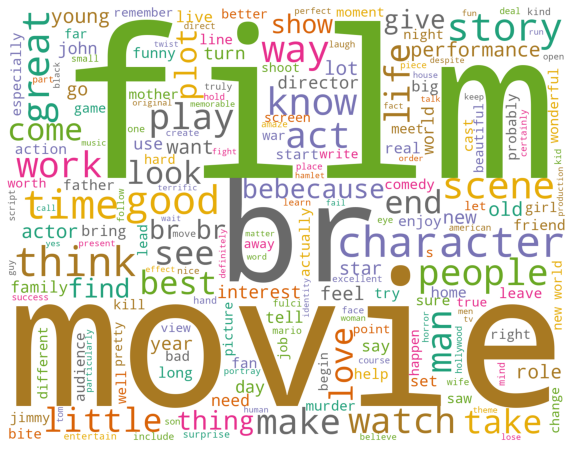

In [28]:
# Positive Word Cloud 

from PIL import Image
plt.figure(figsize=(12,8))
wc = WordCloud(background_color="white",width=1800,height=1400).generate(x)
plt.imshow(wc.recolor(colormap='Dark2', random_state=17), alpha=0.98)
plt.axis("off")
plt.show()

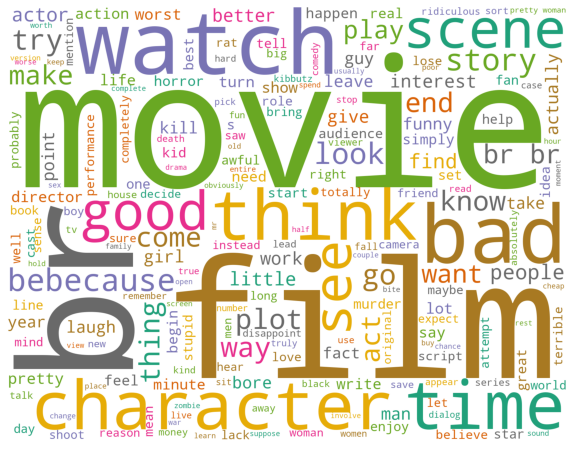

In [29]:
# Negative Word Cloud 

plt.figure(figsize=(12, 8))
wc = WordCloud(background_color="white",width=1800,height=1400).generate(y)
plt.imshow(wc.recolor(colormap='Dark2', random_state=17), alpha=0.98)
plt.axis("off")
plt.show()

## STEP 4 - Algorithms
Now we have the most interesting and important step of the process, the actual algorithms that will perform sentiment analysis on the data. In this section, the algorithms have been designed in a way to run without interference. The client has to run the cells wait for results to be generated based on their data.

If any errors/problems are raised, use google for simple troubleshooting and double ckeck if all previous steps were followed properly. However, a case as such will rarely occur. Client can also contact us via email - guptaabhinav2205@gmail.com or somilkuchhal.kuchhal@gmail.com

### Decision Tree

In [30]:
# Importing Libraries

from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(tfidfX_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [31]:
# Making Predictions

y_pred_dct = dct.predict(tfidfX_test)

# Evaluation Metrics

dct_accuracy = accuracy_score(y_test,y_pred_dct)*100
dct_matrix = confusion_matrix(y_test,y_pred_dct)
dct_precision = dct_matrix[0][0]*100/(dct_matrix[0][0]+dct_matrix[1][0])
dct_recall = dct_matrix[0][0]*100/(dct_matrix[0][0]+dct_matrix[0][1])

print("Accuracy : ",dct_accuracy)
print("Confusion_matrix:\n",dct_matrix)
print("precision:",dct_precision)
print("recall:",dct_recall)

Accuracy :  77.50592271873214
Confusion_matrix:
 [[9414 2511]
 [2996 9561]]
precision: 75.85817888799356
recall: 78.94339622641509


### XG Boosting

In [40]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=22,learning_rate=0.9)
xg.fit(tfidfX_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [41]:
# Making Predictions
y_pred_xg = xg.predict(tfidfX_test)

# Evaluation Metrics

xg_accuracy = accuracy_score(y_test,y_pred_xg)*100
xg_matrix = confusion_matrix(y_test,y_pred_xg)
xg_precision = xg_matrix[0][0]*100/(xg_matrix[0][0]+xg_matrix[1][0])
xg_recall = xg_matrix[0][0]*100/(xg_matrix[0][0]+xg_matrix[0][1])

print("Accuracy : ",xg_accuracy)
print("Confusion_matrix:\n",xg_matrix)
print("precision:",xg_precision)
print("recall:",xg_recall)

Accuracy :  82.30536720856139
Confusion_matrix:
 [[ 9994  1931]
 [ 2401 10156]]
precision: 80.62928600242033
recall: 83.80712788259959


### Random Forest

In [32]:
# Importing Libraries

from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=150,max_depth=None)
rf1.fit(tfidfX_train,y_train)

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_19020/4258069033.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(tfidfX_train,y_train)


RandomForestClassifier(n_estimators=150)

In [33]:
# Making Predictions

y_pred_rf1 = rf1.predict(tfidfX_test)

# Evaluation Metrics

rf1_accuracy = accuracy_score(y_test,y_pred_rf1)*100
rf1_matrix = confusion_matrix(y_test,y_pred_rf1)
rf1_precision = rf1_matrix[0][0]*100/(rf1_matrix[0][0]+rf1_matrix[1][0])
rf1_recall = rf1_matrix[0][0]*100/(rf1_matrix[0][0]+rf1_matrix[0][1])

print("Accuracy : ",rf1_accuracy)
print("Confusion_matrix:\n",rf1_matrix)
print("precision:",rf1_precision)
print("recall:",rf1_recall)

Accuracy :  85.53631239277837
Confusion_matrix:
 [[10243  1682]
 [ 1859 10698]]
precision: 84.63890266071724
recall: 85.895178197065


### Logistic Regression

In [35]:
# Importing Libraries

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0,solver='lbfgs')

lr.fit(tfidfX_train,y_train)

C:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [36]:
# Making Predictions

y_pred_lr = lr.predict(tfidfX_test)

# Evaluation Metrics

lr_accuracy = accuracy_score(y_test,y_pred_lr)*100
lr_matrix = confusion_matrix(y_test,y_pred_lr)
lr_precision = lr_matrix[0][0]*100/(lr_matrix[0][0]+lr_matrix[1][0])
lr_recall = lr_matrix[0][0]*100/(lr_matrix[0][0]+lr_matrix[0][1])

print("Accuracy : ",lr_accuracy)
print("Confusion_matrix:\n",lr_matrix)
print("precision:",lr_precision)
print("recall:",lr_recall)

Accuracy :  81.69675680091495
Confusion_matrix:
 [[ 9808  2117]
 [ 2364 10193]]
precision: 80.57837660203747
recall: 82.24737945492663


### Extra Tree Classifier

In [37]:
# Importing Libraries

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=123)
etc.fit(tfidfX_train,y_train)

C:\Users\ABHINA~1\AppData\Local\Temp/ipykernel_19020/1380816756.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc.fit(tfidfX_train,y_train)


ExtraTreesClassifier(random_state=123)

In [38]:
# Making Predictions

y_pred_etc = etc.predict(tfidfX_test)

# Evaluation Metrics

etc_accuracy = accuracy_score(y_test,y_pred_etc)*100
etc_matrix = confusion_matrix(y_test,y_pred_etc)
etc_precision = etc_matrix[0][0]*100/(etc_matrix[0][0]+etc_matrix[1][0])
etc_recall = etc_matrix[0][0]*100/(etc_matrix[0][0]+etc_matrix[0][1])

print("Accuracy : ",etc_accuracy)
print("Confusion_matrix:\n",etc_matrix)
print("precision:",etc_precision)
print("recall:",etc_recall)

Accuracy :  86.54521689404461
Confusion_matrix:
 [[10437  1488]
 [ 1806 10751]]
precision: 85.24871355060034
recall: 87.52201257861635


### Voting Classifier

In [42]:
# Defining Estimators

estimators = [('dct',dct),('xg',xg),('rf1',rf1),('lr',lr),('etc',etc)]
estimators

[('dct', DecisionTreeClassifier(criterion='entropy', random_state=1)),
 ('xg',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.9, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=22, ...)),
 ('rf1', RandomForestClassifier(n_estimators=150)),
 ('lr', LogisticRegression(random_state=0)),
 ('etc', ExtraTreesClassifier(random_state=123))]

In [43]:
# Evaluating the Estimator

from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators, weights=[0.5,1,2.5,1,2.5])
vc.fit(tfidfX_train,y_train)

C:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier(estimators=[('dct',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=1)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=...
                                            max_delta_step=None, max_depth=None,
           

In [44]:
# Making Predictions

y_pred_vc = vc.predict(tfidfX_test)

# Evaluation Metrics

vc_accuracy = accuracy_score(y_test,y_pred_vc)*100
vc_matrix = confusion_matrix(y_test,y_pred_vc)
vc_precision = vc_matrix[0][0]*100/(vc_matrix[0][0]+vc_matrix[1][0])
vc_recall = vc_matrix[0][0]*100/(vc_matrix[0][0]+vc_matrix[0][1])

print("Accuracy : ",vc_accuracy)
print("Confusion_matrix:\n",vc_matrix)
print("precision:",vc_precision)
print("recall:",vc_recall)

Accuracy :  86.3695776488849
Confusion_matrix:
 [[10374  1551]
 [ 1786 10771]]
precision: 85.3125
recall: 86.99371069182389


## STEP 5 - Results and Discussion
Even though all the algorithms report their individual results, it is very difficult to compare and contrast in given format. Therrefore, we have tabulated the results obtained from all the other algorithms in a single code for easier working. The table reports the accuracy, precision and recall of all algorithms.

The client can compare and contrast the performance of all the different algorithms based on their dataset and choose the right model ahead. We have also created a few graphs that will be generated automatically upon running the code. The graphs also draw attention towards the variation in accuracy, precision and recall values.


Kindly note that this project works as a baseline model to help understand the working of different algorithms on any dataset. There is always scope for additional improvement and enhancement of any model. The client can use this project to select one model out of many to work upon with further scope.

In [45]:
# Printing Results in Tabular Format for Easy Understanding

print("Testing Accuracies")
acc_list = {
    'Decision Tree':dct_accuracy,
    'XG':xg_accuracy,
    'Random Forest':rf1_accuracy,
    'Logistic Regression':lr_accuracy,
    'Extra Tree Classifier':etc_accuracy,
    'Voting Classifier':vc_accuracy
}

precision_list = {
    'Decision Tree':dct_precision,
    'XG':xg_precision,
    'Random Forest':rf1_precision,
    'Logistic Regression':lr_precision,
    'Extra Tree Classifier':etc_precision,
    'Voting Classifier':vc_precision
}

recall_list={
    'Decision Tree':dct_recall,
    'XG':xg_recall,
    'Random Forest':rf1_recall,
    'Logistic Regression':lr_recall,
    'Extra Tree Classifier':etc_recall,
    'Voting Classifier':vc_recall
    
}

acc_df_test = pd.DataFrame.from_dict(acc_list,orient="index",columns=['Accuracy'])
prec_df_test = pd.DataFrame.from_dict(precision_list,orient="index",columns=['Precision'])
f1_df_test = pd.DataFrame.from_dict(recall_list,orient="index",columns=['Recall'])
df_test = pd.concat([acc_df_test,prec_df_test,f1_df_test],axis = 1)
df_test

Testing Accuracies


,Accuracy,Precision,Recall
Decision Tree,77.505923,75.858179,78.943396
XG,82.305367,80.629286,83.807128
Random Forest,85.536312,84.638903,85.895178
Logistic Regression,81.696757,80.578377,82.247379
Extra Tree Classifier,86.545217,85.248714,87.522013
Voting Classifier,86.369578,85.312500,86.993711


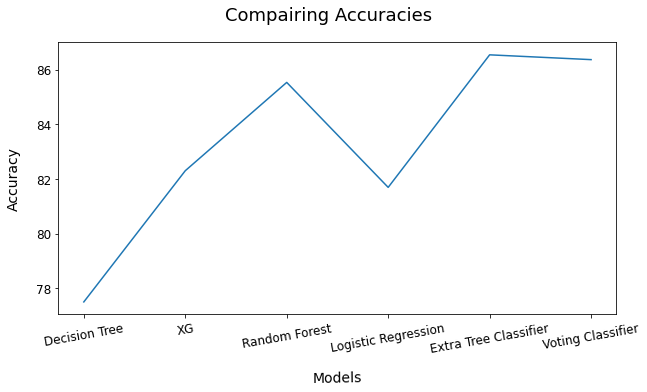

In [46]:
# Generating Graph of Accuracy vs Models

models = list(acc_list.keys())
acc = list(acc_list.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)
plt.ylabel("Accuracy", labelpad=15, fontdict={'size':14})
plt.xlabel("Models", labelpad=15, fontdict={'size':14}, rotation=1)

axs.tick_params(axis='x', rotation=10, labelsize=12)
axs.tick_params(axis='y', labelsize=12)

axs.plot(models, acc)
fig.suptitle('Compairing Accuracies', fontsize=18)
plt.show()

Text(0.5, 0.98, 'Compairing Precision')

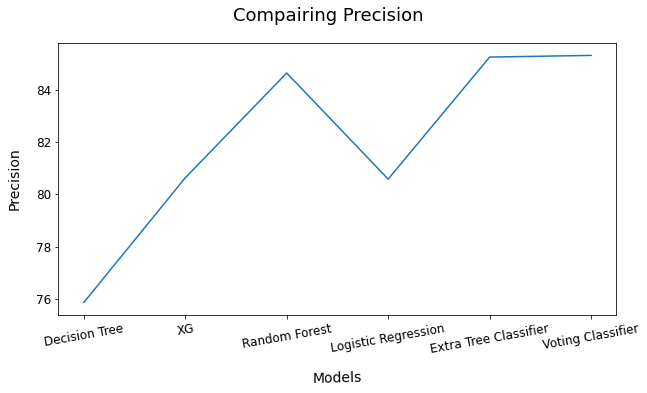

In [47]:
# Generating Graph of Precision vs Models

models = list(precision_list.keys())
prec = list(precision_list.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)
plt.ylabel("Precision", labelpad=15, fontdict={'size':14})
plt.xlabel("Models", labelpad=15, fontdict={'size':14}, rotation=1.5)

axs.tick_params(axis='x', rotation=10, labelsize=12)
axs.tick_params(axis='y', labelsize=12)

axs.plot(models, prec)
fig.suptitle('Compairing Precision', fontsize=18)

Text(0.5, 0.98, 'Compairing Recall')

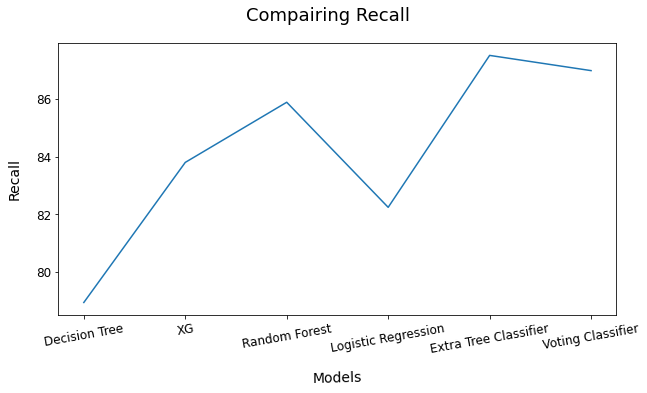

In [48]:
# Generating Graph of Recall vs Models

models = list(recall_list.keys())
recall = list(recall_list.values())

fig, axs = plt.subplots(figsize=(10, 5), sharey=True)
plt.ylabel("Recall", labelpad=15, fontdict={'size':14})
plt.xlabel("Models", labelpad=15, fontdict={'size':14}, rotation=1.5)

axs.tick_params(axis='x', rotation=10, labelsize=12)
axs.tick_params(axis='y', labelsize=12)

axs.plot(models, recall)
fig.suptitle('Compairing Recall', fontsize=18)